In [2]:
import numpy as np
import pandas as pd
import json
import io
import os
import sys
import pickle
import math
import random

import matplotlib.pyplot as plt

In [3]:
def EMD(Z_i, Z_global):
    magnitude = lambda vector: math.sqrt(sum(pow(element, 2) for element in vector))
    return magnitude(Z_i/magnitude(Z_i) - Z_global/magnitude(Z_global))

In [4]:
NO_CLIENTS = 56
NO_GROUPS = 7
NO_CLASSES = 10
ALPHA = "03"

replace_dict = {
    0: 7,
    1: 6,
    2: 5,
    3: 4,
    4: 3,
    5: 2,
    6: 1,
}

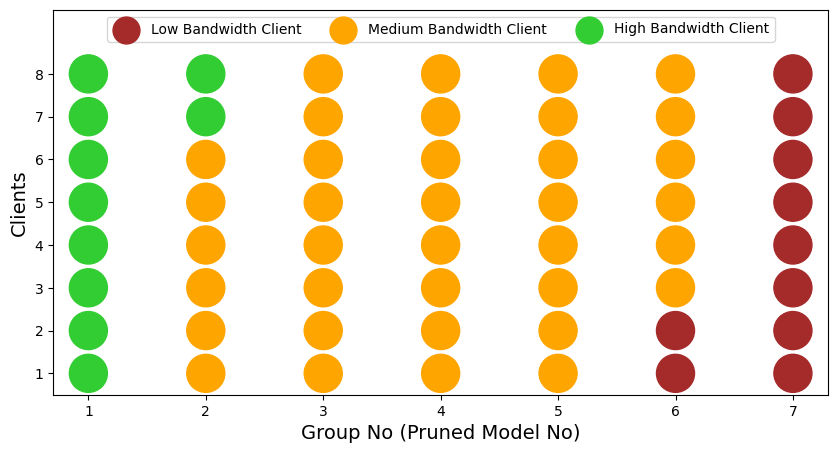

In [11]:
maindf = pd.read_csv("../data/bws_groups.csv", index_col=0)

for idx,row in maindf.iterrows():
    maindf.at[idx,"group"] = replace_dict[row.group]
    maindf.at[idx,"distribution"] = np.array([float(item) for item in row.distribution.replace("[","").replace("]","").split(" ") if item != ""])

import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=14)

def vis_bw_counts(maindf):

    x = np.array(np.meshgrid(np.arange(1,8),np.arange(1,9))).T.reshape(-1,2)[:,0]
    y = np.array(np.meshgrid(np.arange(1,8),np.arange(1,9))).T.reshape(-1,2)[:,1]
    s = np.ones((7,8))*600
    
    tiers = [[] for i in range(7)]
    for group_name, group_df in maindf.groupby("group"):
        tiers[group_name-1] = group_df["bw_type"].tolist()


    circle_size = 750
    s_low = []
    for group_no in range(7):
        s_low.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "low": size = circle_size
            else: size = 0
            s_low[group_no].append(size)

    s_medium = []
    for group_no in range(7):
        s_medium.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "medium": size = circle_size
            else: size = 0
            s_medium[group_no].append(size)

    s_high = []
    for group_no in range(7):
        s_high.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "high": size = circle_size
            else: size = 0
            s_high[group_no].append(size)

    fig = plt.figure(figsize=(10,5))
    plt.scatter(x, y, s_low,    c="brown",      label="Low Bandwidth Client")
    plt.scatter(x, y, s_medium, c="orange",     label="Medium Bandwidth Client")
    plt.scatter(x, y, s_high,   c="limegreen",  label="High Bandwidth Client")
    plt.legend(loc="upper center", ncol=3)
    plt.ylim(0.5,9.5)
    plt.yticks(np.arange(1,9))
    plt.xlabel("Group No (Pruned Model No)", fontproperties=font_prop)
    plt.ylabel("Clients", fontproperties=font_prop)
    # plt.show()

vis_bw_counts(maindf)

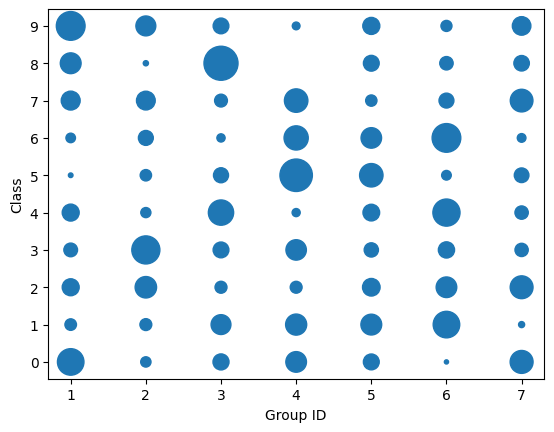

In [6]:
def vis_group_dist(df):

    class_dist = []
    for group_name, group_df in df.groupby("group"):
        class_dist.append(np.sum(group_df.distribution.tolist(),axis=0))
    
    class_dist = np.array(class_dist)

    fig = plt.figure()
    x = np.array(np.meshgrid(np.arange(1,8),np.arange(NO_CLASSES))).T.reshape(-1,2)[:,0]
    y = np.array(np.meshgrid(np.arange(1,8),np.arange(NO_CLASSES))).T.reshape(-1,2)[:,1]
    s = class_dist.reshape(1,-1)[0]
    s = ((s - np.amin(s))/(np.amax(s) - np.amin(s))*600).astype("int")
    plt.scatter(x,y,s)
    plt.yticks(np.arange(10))
    plt.xlabel("Group ID")
    plt.ylabel("Class")
    plt.show()    

vis_group_dist(maindf)

In [54]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=14)

def vis_bw_counts_subplots(maindf, ax, title):

    x = np.array(np.meshgrid(np.arange(1,8),np.arange(1,9))).T.reshape(-1,2)[:,0]
    y = np.array(np.meshgrid(np.arange(1,8),np.arange(1,9))).T.reshape(-1,2)[:,1]
    s = np.ones((7,8))*600
    
    tiers = [[] for i in range(7)]
    for group_name, group_df in maindf.groupby("group"):
        tiers[group_name-1] = group_df["bw_type"].tolist()


    circle_size = 750
    s_low = []
    for group_no in range(7):
        s_low.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "low": size = circle_size
            else: size = 0
            s_low[group_no].append(size)

    s_medium = []
    for group_no in range(7):
        s_medium.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "medium": size = circle_size
            else: size = 0
            s_medium[group_no].append(size)

    s_high = []
    for group_no in range(7):
        s_high.append([])
        for client_no in range(8):
            tier = tiers[group_no][client_no]
            if tier == "high": size = circle_size
            else: size = 0
            s_high[group_no].append(size)

    ax.scatter(x, y, s_low,    c="brown",      label="Low Bandwidth Client")
    ax.scatter(x, y, s_medium, c="orange",     label="Medium Bandwidth Client")
    ax.scatter(x, y, s_high,   c="limegreen",  label="High Bandwidth Client")
    ax.legend(loc="upper center", ncol=3)
    ax.set_ylim(0.5,9.5)
    ax.set_yticks(np.arange(1,9))
    ax.set_xlabel("Group No", fontproperties=font_prop)
    ax.set_ylabel("Clients", fontproperties=font_prop)
    ax.title.set_text(title) 

[2, 3, 4, 5, 6, 7, 1]
## ITER 0 | No operations done : 7
[3, 4, 5, 6, 7, 1, 2]
## ITER 1 | No operations done : 5
[4, 5, 6, 7, 1, 2, 3]
## ITER 2 | No operations done : 4
[5, 6, 7, 1, 2, 3, 4]
## ITER 3 | No operations done : 3
[6, 7, 1, 2, 3, 4, 5]
## ITER 4 | No operations done : 3
[7, 1, 2, 3, 4, 5, 6]
## ITER 5 | No operations done : 1
[1, 2, 3, 4, 5, 6, 7]
## ITER 6 | No operations done : 0
[2, 3, 4, 5, 6, 7, 1]
## ITER 0 | No operations done : 7
[3, 4, 5, 6, 7, 1, 2]
## ITER 1 | No operations done : 4
[4, 5, 6, 7, 1, 2, 3]
## ITER 2 | No operations done : 4
[5, 6, 7, 1, 2, 3, 4]
## ITER 3 | No operations done : 1
[6, 7, 1, 2, 3, 4, 5]
## ITER 4 | No operations done : 0
[2, 3, 4, 5, 6, 7, 1]
## ITER 0 | No operations done : 7
[3, 4, 5, 6, 7, 1, 2]
## ITER 1 | No operations done : 6
[4, 5, 6, 7, 1, 2, 3]
## ITER 2 | No operations done : 5
[5, 6, 7, 1, 2, 3, 4]
## ITER 3 | No operations done : 3
[6, 7, 1, 2, 3, 4, 5]
## ITER 4 | No operations done : 1
[7, 1, 2, 3, 4, 5, 6]
## ITER 5

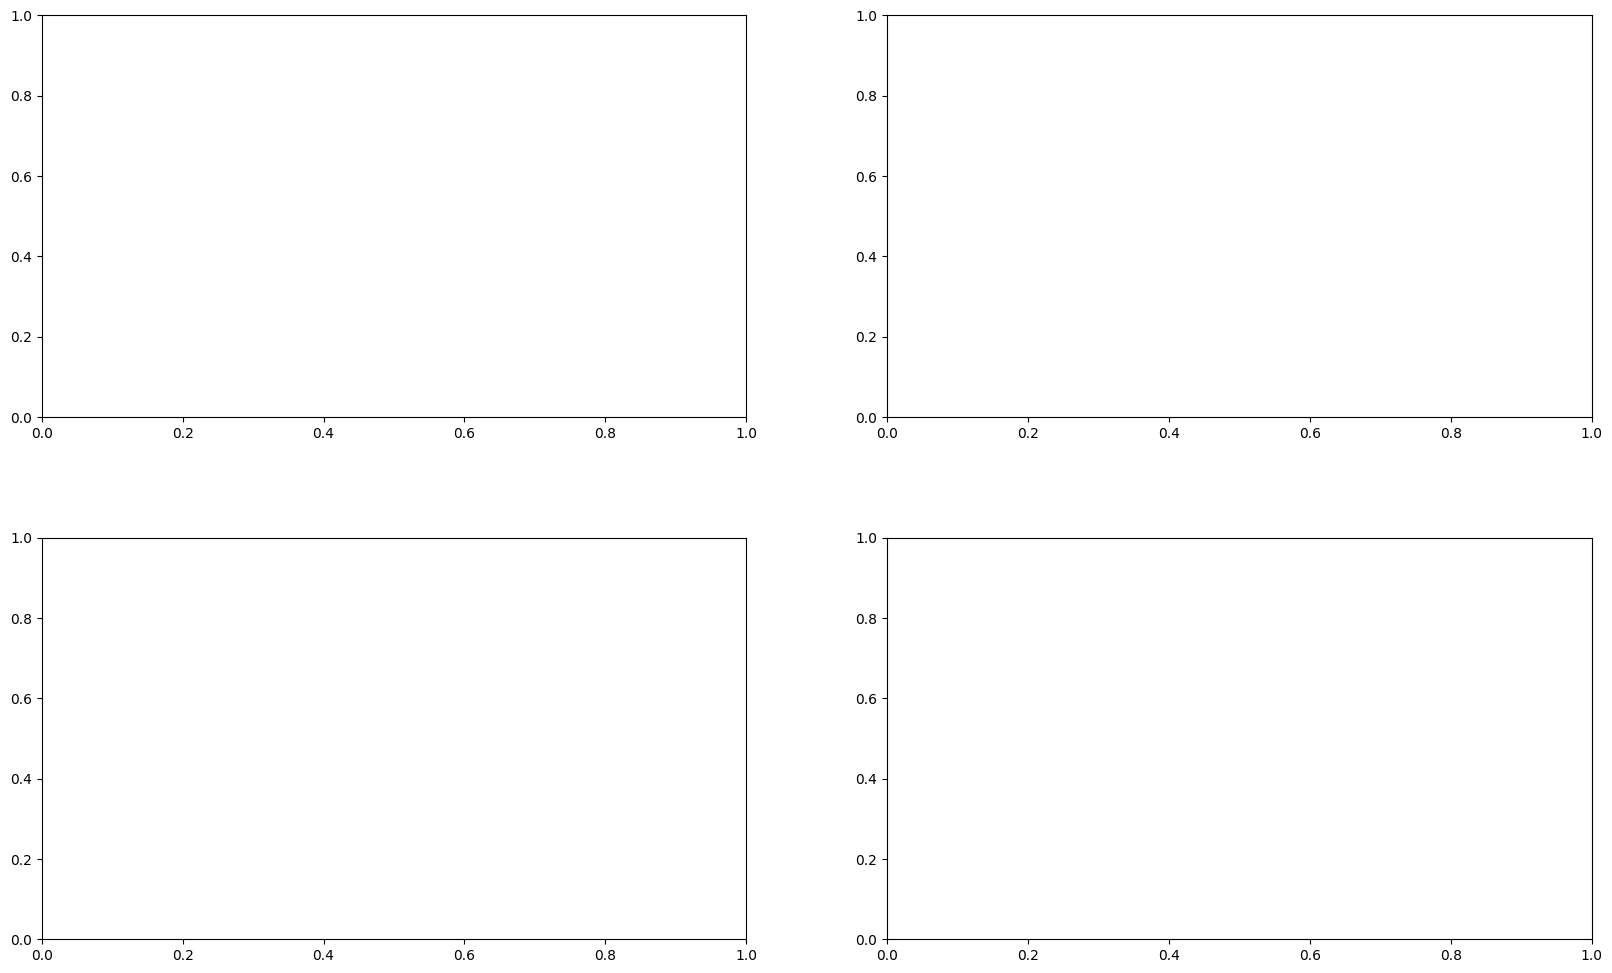

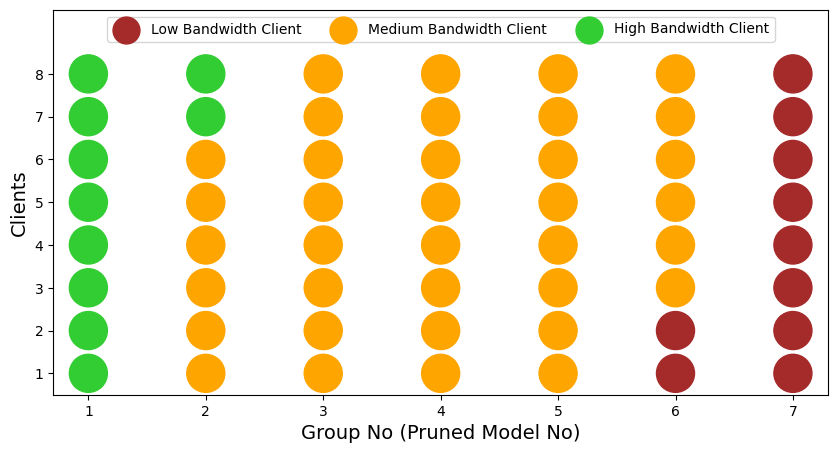

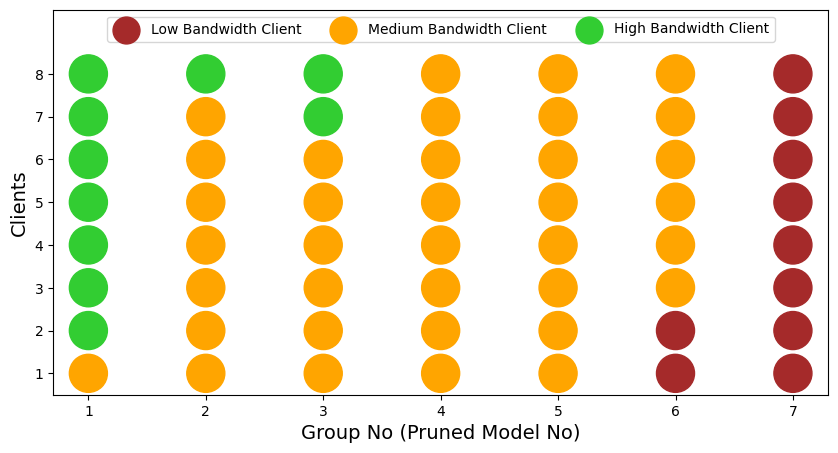

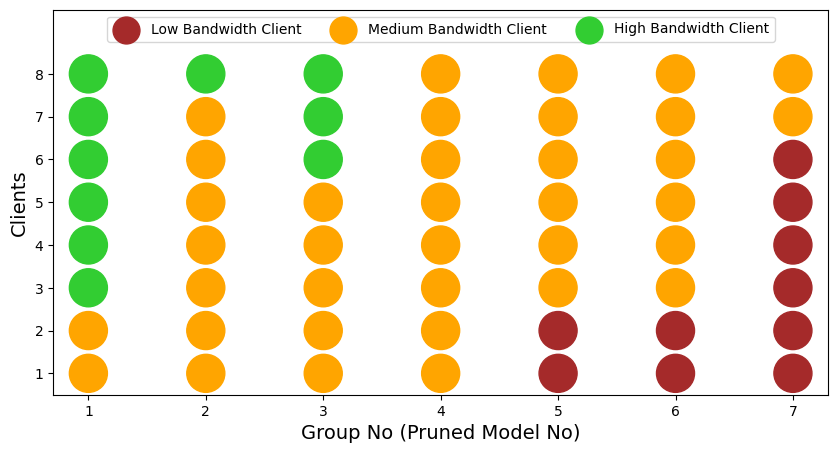

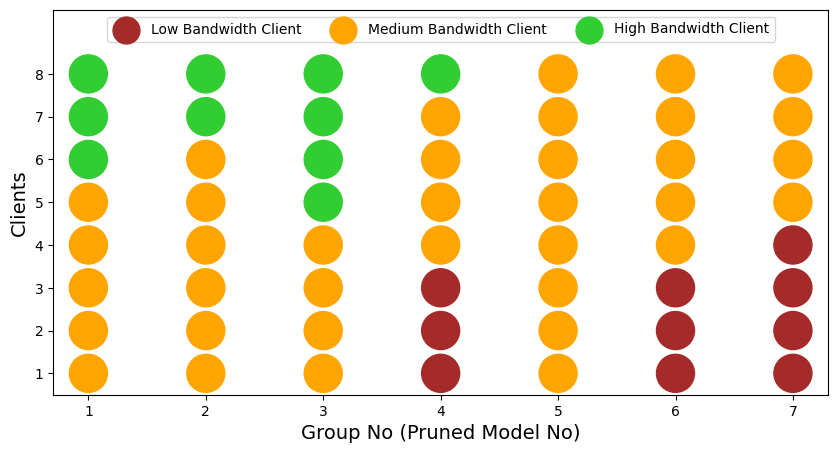

In [15]:
def transfer_op(df_iter, candidate_operations, selected_idx):
    selected_operation = candidate_operations[selected_idx]

    df_dict = df_iter.to_dict(orient="index")
    main_group = df_dict[selected_operation[0]]["group"]
    other_group = df_dict[selected_operation[1]]["group"]

    df_iter.at[selected_operation[0], "group"] = other_group
    df_iter.at[selected_operation[1], "group"] = main_group

    return df_iter

def average_EMD(df_iter, global_dist):
    EMDs = []
    for group_name, group_df in df_iter.groupby("group"):
        EMDs.append(EMD(np.sum(group_df.distribution.values, axis=0), global_dist))
    return np.mean(EMDs)

global_dist = np.sum(maindf.distribution.values, axis=0)

COEFF = 1.0
emd_scores = []
# fig, axs = plt.subplots(2, 2, figsize=(20,12))
# plt.subplots_adjust(hspace=0.3)

# 0 1 2 3
# 0 0 1 1
# 0 1 0 1
ii = 0
for COEFF in [0.5,0.7,0.9,1.0]:
    df_iter = maindf.copy()

    all_scores = []
    scores = []
    emds = []
    for group_no in range(NO_GROUPS,0,-1):
        group_selected = df_iter[df_iter["group"] == group_no]
        group_dist = np.sum(group_selected.distribution.values, axis=0)
        scores.append(EMD(group_dist, global_dist))
    all_scores.append(scores)


    seq_of_move = np.arange(1,NO_GROUPS+1).tolist()

    for iter_no in range(10):
        no_operations_done = 0
        # for group_no in range(NO_GROUPS,0,-1):
        # seq_of_move = sorted(np.arange(1,NO_GROUPS+1), key=lambda k: random.random())
        seq_of_move = seq_of_move[1:] + seq_of_move[: 1]
        print(seq_of_move)
        for group_no in seq_of_move:
            current_emd = average_EMD(df_iter, global_dist)
            group_selected = df_iter[df_iter["group"] == group_no]
            
            group_friend_next = df_iter[df_iter["group"] == group_no-1]
            group_friend_prev = df_iter[df_iter["group"] == group_no+1]

            group_friend_next_2 = df_iter[df_iter["group"] == group_no-2]
            group_friend_prev_2 = df_iter[df_iter["group"] == group_no+2]

            candidate_groups = [
                group_friend_next,
                group_friend_prev,
                group_friend_next_2,
                group_friend_prev_2
                ]

            group_dist = np.sum(group_selected.distribution.to_numpy(), axis=0)
            score = EMD(group_dist, global_dist)
            candidate_operations = []
            bw_debug = []
            for idx, row in group_selected.iterrows():
                client_id = row.client_id
                group_dist_wo = group_dist - np.array(row.distribution)
                bw_type = row.bw_type

                for candidate_group in candidate_groups:
                    for idx2, row2 in candidate_group.iterrows():
                        candidate_dist = group_dist_wo + np.array(row2.distribution)
                        candidate_score = EMD(candidate_dist ,global_dist)
                        bw_type_candidate = row2.bw_type
                        if bw_type == bw_type_candidate: coeff = 1
                        else:
                            # coeff = COEFF**(iter_no+1)
                            coeff = COEFF

                        if candidate_score < score*coeff:

                            df_iter_temp = transfer_op(df_iter.copy(), [(client_id, row2.client_id, candidate_score)], -1)
                            avg_emd = average_EMD(df_iter_temp, global_dist)
                            emds.append(avg_emd)

                            # candidate_operations.append((client_id, row2.client_id, candidate_score))
                            candidate_operations.append((client_id, row2.client_id, avg_emd))
                            bw_debug.append((bw_type, bw_type_candidate))


            # Transfer operation            
            candidate_operations = np.array(candidate_operations)
            if len(candidate_operations) > 0:
                selected_idx = np.argmin(candidate_operations[:,2])
                if current_emd > candidate_operations[selected_idx,2]:
                    # print(candidate_operations[selected_idx], bw_debug[selected_idx])
                    df_iter = transfer_op(df_iter, candidate_operations, selected_idx)
                    no_operations_done += 1

        scores = []
        for group_no in range(NO_GROUPS,0,-1):
            group_selected = df_iter[df_iter["group"] == group_no]
            group_dist = np.sum(group_selected.distribution.to_numpy(), axis=0)
            scores.append(EMD(group_dist, global_dist))
        all_scores.append(scores)

        print(f"## ITER {iter_no} | No operations done : {no_operations_done}")
        if no_operations_done == 0:
            break

    vis_bw_counts(
        df_iter
        )
    ii += 1
    plt.savefig(f"figures/netdog_coeff_{COEFF}".replace(".","") + ".png",bbox_inches='tight')
    # vis_bw_counts(df_iter)

    ### EMD CHANGE
    all_scores = np.array(all_scores)
    # ax = plt.subplots(figsize=(10,5))
    # for group_no in range(NO_GROUPS):
    #     plt.plot(np.arange(1,len(all_scores)+1), all_scores[:,group_no], label=f"Group {group_no+1}", linewidth=2)
    # plt.xlabel("Iteration")
    # plt.ylabel("EMD")
    # plt.legend()
    # plt.show()

    # plt.figure(figsize=(10,3))
    # plt.boxplot(all_scores.T)
    # plt.xlabel("Iteration")
    # plt.ylabel("EMD")
    # plt.show()
    emd_scores.append(all_scores[-1].tolist())

fig

In [62]:
np.mean(emd_scores, axis=1)

array([0.30580562, 0.32535514, 0.25225231, 0.23028898])

In [67]:
pd.DataFrame(emd_scores).round(2)

,0,1,2,3,4,5,6
0,0.34,0.25,0.33,0.23,0.19,0.20,0.60
1,0.34,0.32,0.28,0.31,0.23,0.25,0.57
2,0.33,0.17,0.22,0.24,0.34,0.21,0.26
3,0.21,0.27,0.26,0.22,0.31,0.22,0.12
